## Ex4.1. Image binarization
Using thresholding techniques to convert the grayscale image into a binary image.


In [1]:
!wget sudoku.jpg https://aishack.in/static/img/tut/sudoku-original.jpg

--2021-10-26 08:43:51--  http://sudoku.jpg/
Resolving sudoku.jpg (sudoku.jpg)... failed: Name or service not known.
wget: unable to resolve host address ‘sudoku.jpg’
--2021-10-26 08:43:51--  https://aishack.in/static/img/tut/sudoku-original.jpg
Resolving aishack.in (aishack.in)... 50.116.7.87
Connecting to aishack.in (aishack.in)|50.116.7.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53178 (52K) [image/jpeg]
Saving to: ‘sudoku-original.jpg’

sudoku-original.jpg 100%[===================>]  51.93K  --.-KB/s    in 0.04s   

2021-10-26 08:43:51 (1.42 MB/s) - ‘sudoku-original.jpg’ saved [53178/53178]

FINISHED --2021-10-26 08:43:51--
Total wall clock time: 0.2s
Downloaded: 1 files, 52K in 0.04s (1.42 MB/s)


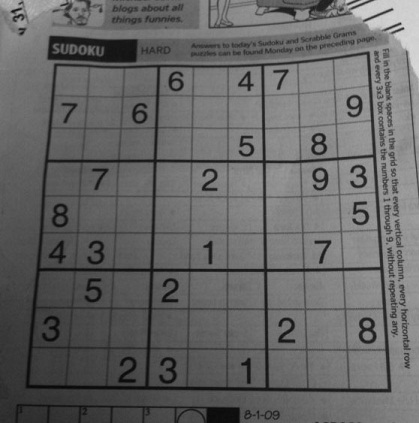

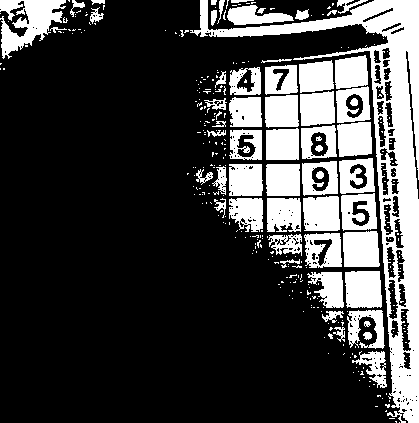

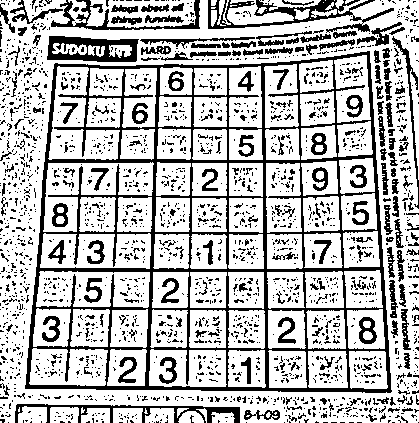

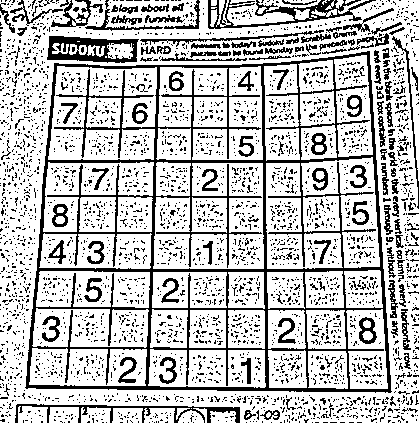

In [25]:
import cv2 as cv
import numpy as np

img = cv.imread('sudoku-original.jpg',0)
_, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2);
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2);
#THRESH_BINARY
cv2_imshow(img)
#THRESH_BINARY
cv2_imshow(th1)
#ADAPTIVE_THRESH_MEAN_C
cv2_imshow(th2)
#ADAPTIVE_THRESH_GAUSSIAN_C
cv2_imshow(th3)

## Ex4.2. Number bounding-box
Given an input image as follows (numbers are pixel intensities). Using morphological operations and contour to draw rectangles surrounding each number (bounding boxes).


In [26]:
!wget input_image.jpg https://learnopencv.com/wp-content/uploads/2021/06/input_image.jpg

--2021-10-26 08:53:38--  http://input_image.jpg/
Resolving input_image.jpg (input_image.jpg)... failed: Name or service not known.
wget: unable to resolve host address ‘input_image.jpg’
--2021-10-26 08:53:38--  https://learnopencv.com/wp-content/uploads/2021/06/input_image.jpg
Resolving learnopencv.com (learnopencv.com)... 172.66.41.41, 172.66.42.215, 2606:4700:3108::ac42:2ad7, ...
Connecting to learnopencv.com (learnopencv.com)|172.66.41.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9618 (9.4K) [image/jpeg]
Saving to: ‘input_image.jpg’

input_image.jpg     100%[===================>]   9.39K  --.-KB/s    in 0s      

2021-10-26 08:53:38 (79.1 MB/s) - ‘input_image.jpg’ saved [9618/9618]

FINISHED --2021-10-26 08:53:38--
Total wall clock time: 0.2s
Downloaded: 1 files, 9.4K in 0s (79.1 MB/s)


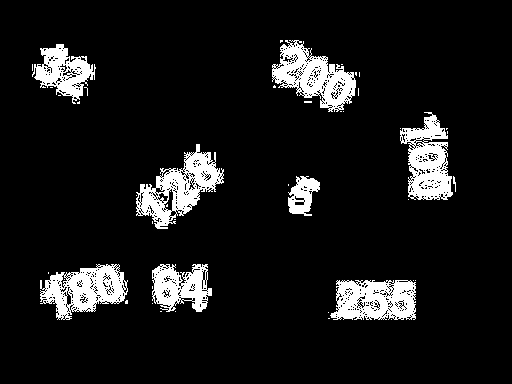

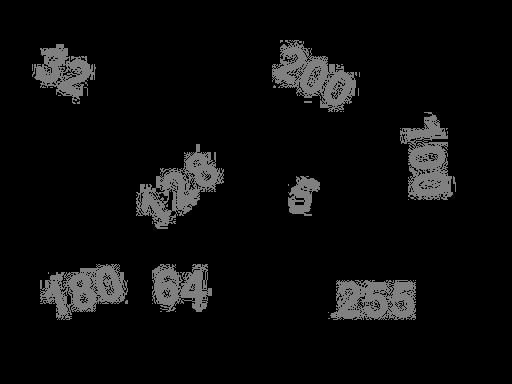

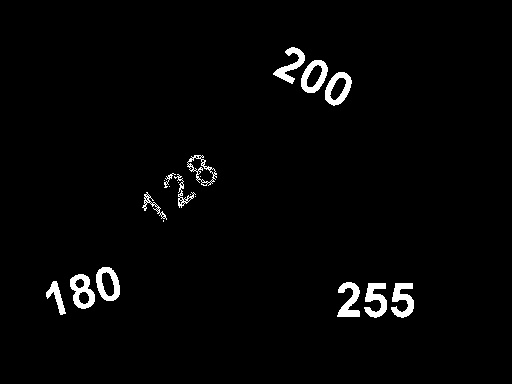

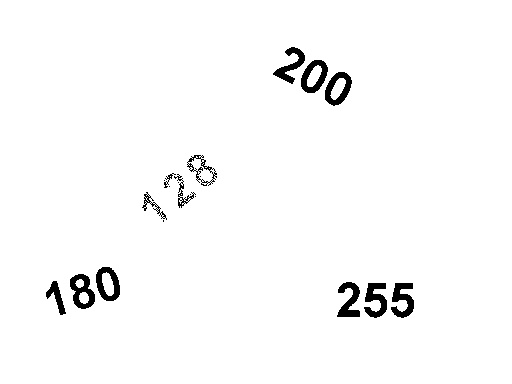

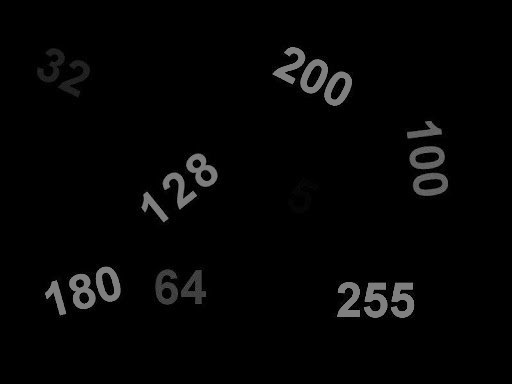

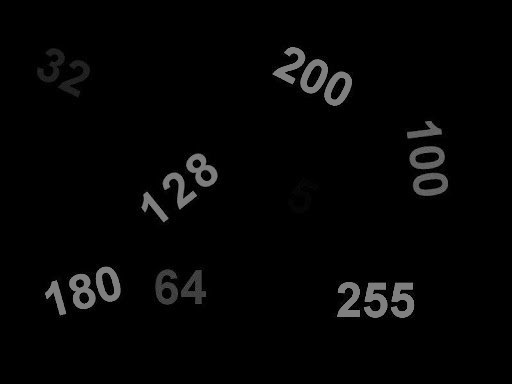

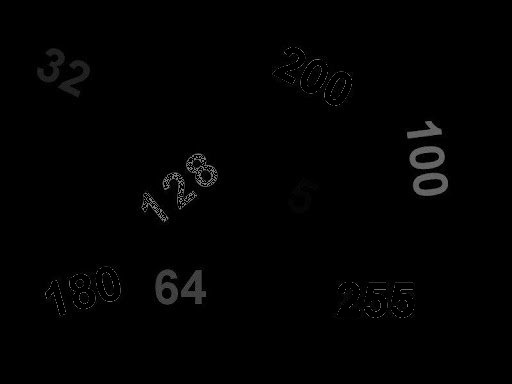

In [36]:
src = cv2.imread("input_image.jpg", cv2.IMREAD_GRAYSCALE); 

# Basic threhold example 
th, dst = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY); 
cv2.imwrite("opencv-threshold-example.jpg", dst); 
img = cv.imread('opencv-threshold-example.jpg',0)
cv2_imshow(img)
# Thresholding with maxValue set to 128
th, dst = cv2.threshold(src, 0, 128, cv2.THRESH_BINARY); 
cv2.imwrite("opencv-thresh-binary-maxval.jpg", dst); 
img = cv.imread('opencv-thresh-binary-maxval.jpg',0)
cv2_imshow(img)
# Thresholding with threshold value set 127 
th, dst = cv2.threshold(src,127,255, cv2.THRESH_BINARY); 
cv2.imwrite("opencv-thresh-binary.jpg", dst); 
img = cv.imread('opencv-thresh-binary.jpg',0)
cv2_imshow(img)
# Thresholding using THRESH_BINARY_INV 
th, dst = cv2.threshold(src,127,255, cv2.THRESH_BINARY_INV); 
cv2.imwrite("opencv-thresh-binary-inv.jpg", dst); 
img = cv.imread('opencv-thresh-binary-inv.jpg',0)
cv2_imshow(img)
# Thresholding using THRESH_TRUNC 
th, dst = cv2.threshold(src,127,255, cv2.THRESH_TRUNC); 
cv2.imwrite("opencv-thresh-trunc.jpg", dst); 
img = cv.imread('opencv-thresh-trunc.jpg',0)
cv2_imshow(img)
# Thresholding using THRESH_TOZERO 
th, dst = cv2.threshold(src,127,255, cv2.THRESH_TOZERO); 
cv2.imwrite("opencv-thresh-tozero.jpg", dst); 
img = cv.imread('opencv-thresh-trunc.jpg',0)
cv2_imshow(img)
# Thresholding using THRESH_TOZERO_INV 
th, dst = cv2.threshold(src,127,255, cv2.THRESH_TOZERO_INV); 
cv2.imwrite("opencv-thresh-to-zero-inv.jpg", dst); 
img = cv.imread('opencv-thresh-to-zero-inv.jpg',0)
cv2_imshow(img)

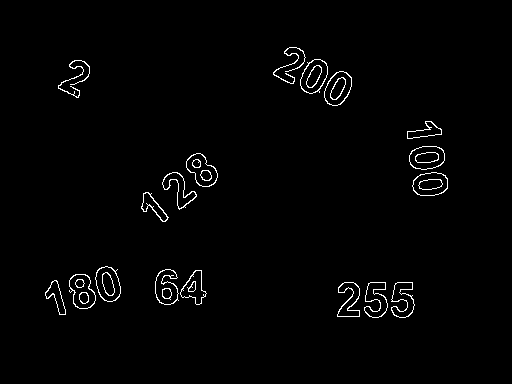

Number of Contours found = 18


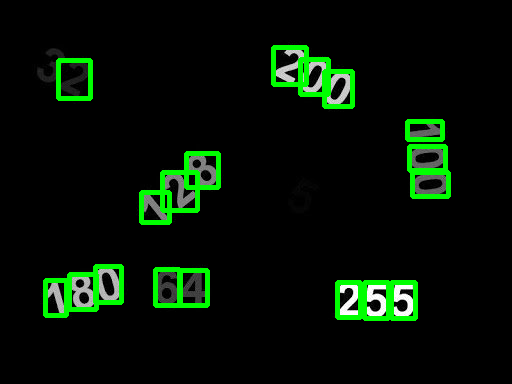

In [84]:
import cv2
import numpy as np
image = cv2.imread('input_image.jpg')
cv2.waitKey(0)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 30, 200)
cv2.waitKey(0)
contours, hierarchy = cv2.findContours(edged,
	cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2_imshow(edged)
print("Number of Contours found = " + str(len(contours)))

for c in contours:
  x, y, w, h = cv2.boundingRect(c)
  if (cv2.contourArea(c)) > 10:
    cv2.rectangle(image,(x,y), (x+w,y+h), (0, 255, 0), 3)
cv2_imshow(image)

## Ex4.3. Digit bounding-box
Using morphological operations and contour to draw rectangles surrounding each digit (bounding boxes).


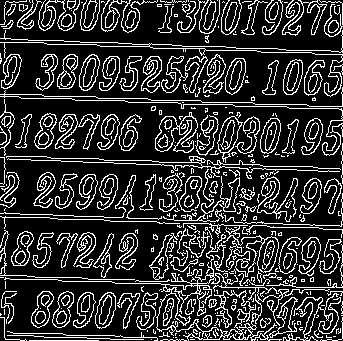

Number of Contours found = 360


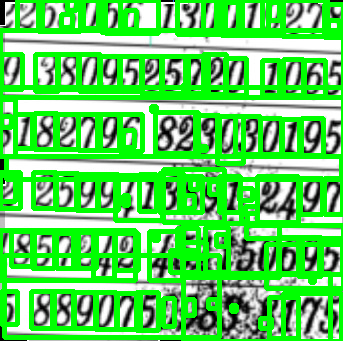

In [87]:
import cv2
import numpy as np
image = cv2.imread('hinh.jpg')
cv2.waitKey(0)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 30, 200)
cv2.waitKey(0)
contours, hierarchy = cv2.findContours(edged,
	cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2_imshow(edged)
print("Number of Contours found = " + str(len(contours)))

for c in contours:
  x, y, w, h = cv2.boundingRect(c)
  if (cv2.contourArea(c)) > 10:
    cv2.rectangle(image,(x,y), (x+w,y+h), (0, 255, 0), 3)
cv2_imshow(image)